# 2. Evolutionary Simulations Analysis

**Imports**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches

In [3]:
import matplotlib.gridspec as gridspec

In [4]:
from tqdm.notebook import tqdm

In [5]:
import numpy as np

In [6]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

In [7]:
def one_bit_condition_one(p1, p2, c, b):
    return p2 < 1 - c / b


def one_bit_condition_two(p1, p2, c, b):
    return p1 > 0.95


def is_partner_one_bit(p1, p2, c, b):
    return (one_bit_condition_one(p1, p2, c, 1)) and (
        one_bit_condition_two(p1, p2, c, 1)
    )

In [8]:
def two_bit_condition_one(p1, p2, p3, p4, c, b):
    return p4 < (1 - c / b)


def two_bit_condition_two(p1, p2, p3, p4, c, b):
    return p2 + p3 < (2 - c / b)


def two_bit_condition_three(p1, p2, p3, p4, c, b):
    return p1 > 0.95


def is_partner_two_bits(p1, p2, p3, p4, c, b):
    return (
        (two_bit_condition_one(p1, p2, p3, p4, c, 1))
        and two_bit_condition_two(p1, p2, p3, p4, c, 1)
        and two_bit_condition_three(p1, p2, p3, p4, c, 1)
    )

In [9]:
def three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p8 < (1 - c / b)


def three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p3 + p6 < (2 - c / b)


def three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p2 + p3 + p5 < (3 - c / b)


def three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p4 + p6 + p7 < (3 - 2 * c / b)


def three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p2 + p4 + p5 + p7 < (4 - 2 * c / b)


def three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p1 > 0.95


def is_partner_three_bits(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return (
        (three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
    )

**Setup**

In [10]:
colors_dic = {
    "R1": "tab:orange",
    "R2": "tab:green",
    "R3": "tab:blue",
    "R4": "chocolate",
    "R5": "yellowgreen",
    "R6": "dodgerblue",
}

colors = [
    "tab:orange",
    "tab:green",
    "tab:blue",
    "chocolate",
    "yellowgreen",
    "dodgerblue",
]

linestyles = ["-o", "--o", ":o"]

**Data**

In [11]:
reactive_abundant = pd.read_csv(
    "../prc_data/evolution_over_seeds_reactive_new.csv", index_col=0
)

self_reactive_abundant = pd.read_csv(
    "../prc_data/evolution_over_seeds_reactive_counting.csv", index_col=0
)

In [15]:
reactive_abundant['seed'].nunique(), self_reactive_abundant['seed'].nunique()

(20, 20)

In [16]:
dists = []

reactive = []


for type_, variables in zip(
    ["one", "two", "three"],
    [
        ["p_1", "p_2", "frequencies"],
        ["p_1", "p_2", "p_3", "p_4", "frequencies"],
        ["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "frequencies"],
    ],
):
    groups = reactive_abundant[
        (reactive_abundant["type"] == type_) & (reactive_abundant["p_1"] > 0.95)
    ].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group["frequencies"].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))

    reactive.append(ps[:-1])
    
dists.append(reactive)

In [17]:
counting = []
freqs = []
for type_, variables in zip(
    ["counting-two", "counting-three"],
    [
        ["p_1", "p_2", "p_4", "frequencies"],
        ["p_1", "p_2", "p_7", "p_8", "frequencies"],
    ],
):
    groups = self_reactive_abundant[
        (self_reactive_abundant["type"] == type_)
        & (self_reactive_abundant["p_1"] > 0.95)
    ].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group["frequencies"].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))
    freqs.append(ps[-1])

    counting.append(ps[:-1])

In [18]:
counting.insert(0, reactive[0])

In [19]:
dists.append(counting)

In [20]:
groups = self_reactive_abundant[self_reactive_abundant['type'] == 'counting-three'].groupby("seed")

In [21]:
groups = list(groups)

In [22]:
groups = [group[1].sort_values("frequencies") for group in groups]

In [23]:
groups[2].tail()

,p_1,p_2,p_3,p_4,t,cooperation,type,seed,frequencies,frequencies norm,p_5,p_6,p_7,p_8
80231,0.999721,0.405498,0.405498,0.284948,16561480,0.953202,counting-three,3,28175,0.001409,0.405498,0.284948,0.284948,0.337426
74955,0.998465,0.348667,0.348667,0.785538,15479395,0.940452,counting-three,3,33142,0.001657,0.348667,0.785538,0.785538,0.046698
40075,0.999985,0.073127,0.073127,0.482792,8116906,0.973615,counting-three,3,36015,0.001801,0.073127,0.482792,0.482792,0.324271
71091,0.999591,0.513059,0.513059,0.322875,14666368,0.961951,counting-three,3,41550,0.002077,0.513059,0.322875,0.322875,0.137724
65217,0.999842,0.221930,0.221930,0.638250,13324495,0.975472,counting-three,3,92222,0.004611,0.221930,0.638250,0.638250,0.257029


## Results over seeds

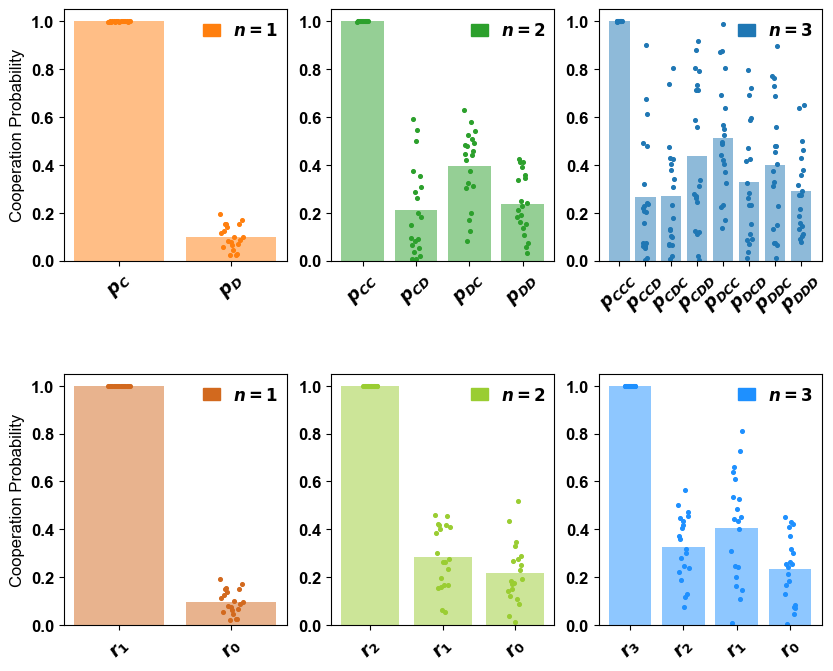

In [24]:
spacing = np.linspace(-0.1, 0.1, 20)

evens = np.arange(1, 17, 1)


fig = plt.figure(figsize=(22, 8))

outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.45)

count = 0

for i, plot in enumerate([0, 2]):
    inner = gridspec.GridSpecFromSubplotSpec(
        1, 3, subplot_spec=outer[plot], wspace=0.2, hspace=0.1
    )

    for j, dist in enumerate(dists[i]):
        averages = np.mean(dist, axis=1)
        ax = plt.Subplot(fig, inner[j])

        for l, data in enumerate(dist):
            for l2, point in enumerate(data):
                _ = ax.scatter(
                    0 + evens[l] + spacing[l2],
                    point,
                    color=colors_dic[f"R{j + 1 + (i * 3)}"],
                    s=7,
                    zorder=2,
                )
            _ = ax.bar(
                evens[l],
                averages[l],
                color=colors_dic[f"R{j + 1 + (i * 3)}"],
                alpha=0.5,
            )

        label = [
            (
                mpatches.Patch(color=colors_dic[f"R{j + 1 + (i * 3)}"]),
                f"$n={(j % 3) + 1}$",
            )
        ]

        ax.legend(
            *zip(*label),
            bbox_to_anchor=(1.03, 1.01),
            handlelength=1,
            fontsize=12,
            frameon=False,
        )

        if (j + (i * 3)) == 0:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")

            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$p_C$", "$p_D$"], rotation=45, fontsize=13)
        if (j + (i * 3)) == 1:
            ax.set_xticks([1, 2, 3, 4])
            ax.set_xticklabels(
                ["$p_{CC}$", "$p_{CD}$", "$p_{DC}$", "$p_{DD}$"],
                rotation=45,
                fontsize=13,
            )
        if (j + (i * 3)) == 2:
            ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
            ax.set_xticklabels(
                [
                    "$p_{CCC}$",
                    "$p_{CCD}$",
                    "$p_{CDC}$",
                    "$p_{CDD}$",
                    "$p_{DCC}$",
                    "$p_{DCD}$",
                    "$p_{DDC}$",
                    "$p_{DDD}$",
                ],
                rotation=45,
                fontsize=13,
            )

        if (j + (i * 3)) == 3:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$r_1$", "$r_0$"], rotation=45, fontsize=13)

        if (j + (i * 3)) == 4:
            ax.set_xticks([1, 2, 3])
            ax.set_xticklabels(
                ["$r_2$", "$r_1$", "$r_0$"], rotation=45, fontsize=13
            )
        if (j + (i * 3)) == 5:
            ax.set_xticks(
                [
                    1,
                    2,
                    3,
                    4,
                ]
            )
            ax.set_xticklabels(
                [
                    "$r_3$",
                    "$r_2$",
                    "$r_1$",
                    "$r_0$",
                ],
                rotation=45,
                fontsize=13,
            )

        fig.add_subplot(ax)

## Cooperation for different $\beta$ and memory

In [11]:
import numpy as np

In [12]:
reactive_one = pd.read_csv(
    "../prc_data/evolution_over_c_and_beta_reactive_one.csv", index_col=0
)

reactive_two = pd.read_csv(
    "../prc_data/evolution_over_c_and_beta_reactive_two.csv", index_col=0
)

reactive_three = pd.read_csv(
    "../prc_data/evolution_over_c_and_beta_reactive_three.csv", index_col=0
)

In [13]:
reactive_one["type"] = "1"
reactive_two["type"] = "2"
reactive_three["type"] = "3"

In [14]:
beta_one = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 1)],
        reactive_two[(reactive_two["beta"] == 1)],
        reactive_three[(reactive_three["beta"] == 1)],
    ]
)

In [28]:
temp = beta_one[(beta_one['type'] == '1') & (beta_one['c'] == 0.3)]

In [29]:
sum(temp["frequencies norm"] * temp["cooperation"])

0.47908030917487

In [29]:
beta_two = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 2)],
        reactive_two[(reactive_two["beta"] == 2)],
        reactive_three[(reactive_three["beta"] == 2)],
    ]
)

In [30]:
beta_point = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 0.1)],
        reactive_two[(reactive_two["beta"] == 0.1)],
        reactive_three[(reactive_three["beta"] == 0.1)],
    ]
)

In [31]:
reactive_one = reactive_one[(reactive_one["beta"] != 10)]

reactive_two = reactive_two[(reactive_two["beta"] != 10)]

reactive_three = reactive_three[(reactive_three["beta"] != 10)]

In [32]:
reactive_counting_two = pd.read_csv(
    "../prc_data/evolution_over_c_and_beta_reactive_counting_two.csv",
    index_col=0,
)

reactive_counting_three = pd.read_csv(
    "../prc_data/evolution_over_c_and_beta_reactive_counting_three.csv",
    index_col=0,
)

In [33]:
reactive_counting_two["type"] = "2"
reactive_counting_three["type"] = "3"

In [34]:
count_beta_one = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 1)],
        reactive_counting_two[(reactive_counting_two["beta"] == 1)],
        reactive_counting_three[(reactive_counting_three["beta"] == 1)],
    ]
)

In [35]:
count_beta_two = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 2)],
        reactive_counting_two[(reactive_counting_two["beta"] == 2)],
        reactive_counting_three[(reactive_counting_three["beta"] == 2)],
    ]
)

In [36]:
count_beta_point = pd.concat(
    [
        reactive_one[(reactive_one["beta"] == 0.1)],
        reactive_counting_two[(reactive_counting_two["beta"] == 0.1)],
        reactive_counting_three[(reactive_counting_three["beta"] == 0.1)],
    ]
)

In [37]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=2", r"$\beta$=10"]

In [38]:
color = '#FDF6E3'

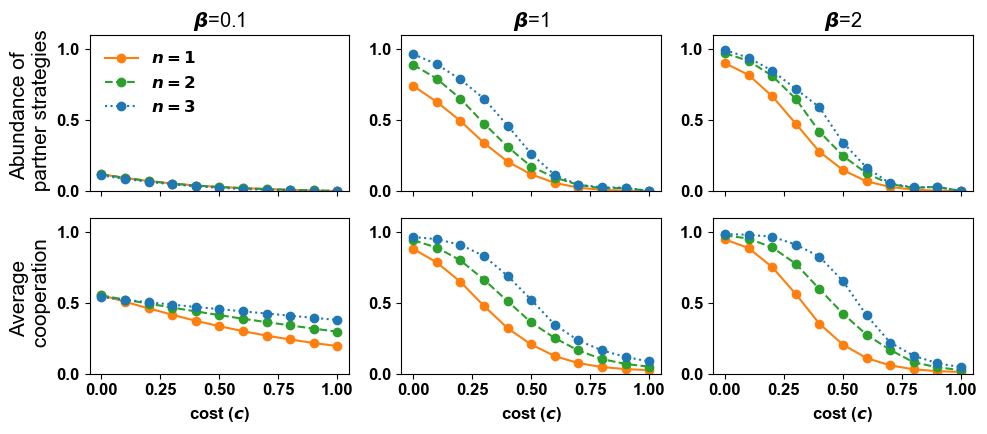

In [43]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 4.5), sharex=True)

for i, df in enumerate([reactive_one, reactive_two, reactive_three]):
    groups_beta = df.groupby("beta")

    for j, (beta, group) in enumerate(groups_beta):
        points = []
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(
                sum(cost_group["frequencies norm"] * cost_group["cooperation"])
            )
            abudance.append(
                cost_group[cost_group["isPartner"] == True][
                    "frequencies norm"
                ].sum()
            )

        axes[0, j].plot(
            np.linspace(0, 1, 11),
            abudance,
            linestyles[i],
            color=colors_dic[f"R{i + 1}"],
            label=f"$n = {i + 1}$",
        )

        axes[1, j].plot(
            np.linspace(0, 1, 11),
            points,
            linestyles[i],
            color=colors_dic[f"R{i + 1}"],
            label=f"$n = {i + 1}$",
        )


for i in range(3):
    for j in range(2):
        axes[j, i].set_ylim(0, 1.1)
        axes[j, i].set_ylim(0, 1.1)
#         axes[j, i].set_facecolor(color)

    axes[0, i].set_title(labels[i])

axes[0, 0].legend(fontsize=12, loc=2, frameon=False)

axes[1, 0].set_xlabel("cost ($c$)")
axes[1, 1].set_xlabel("cost ($c$)")
axes[1, 2].set_xlabel("cost ($c$)")

for i in [0]:
    axes[i, 0].set_ylabel(
        "Abundance of \n partner strategies", fontweight="normal", fontsize=15
    )
    

for i in [1]:
    axes[i, 0].set_ylabel(
        "Average \n cooperation", fontweight="normal", fontsize=15
    )

    

# fig.patch.set_facecolor(color)
fig.tight_layout()

# fig.savefig("/Users/glynatsi/src/talks/talks/2024-Summer/static/fig3.pdf", bbox_inches='tight')

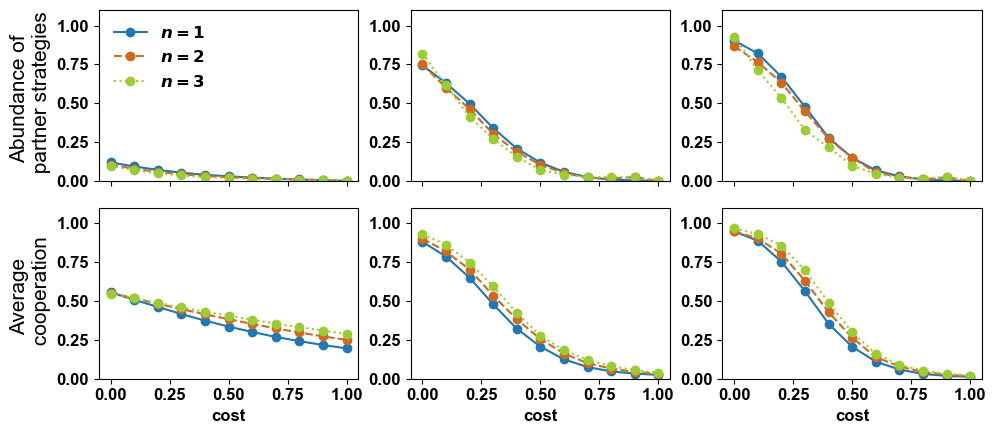

In [44]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 4.5), sharex=True)


for i, df in enumerate(
    [reactive_one, reactive_counting_two, reactive_counting_three]
):
    groups_beta = df.groupby("beta")

    for j, (beta, group) in enumerate(groups_beta):
        if beta != 10:
            points = []
            abudance = []
            group = group.sort_values("c")
            cost_groups = group.groupby("c")

            for _, cost_group in cost_groups:
                points.append(
                    sum(
                        cost_group["frequencies norm"]
                        * cost_group["cooperation"]
                    )
                )
                abudance.append(
                    cost_group[cost_group["isPartner"] == True][
                        "frequencies norm"
                    ].sum()
                )

            axes[0, j].plot(
                np.linspace(0, 1, 11),
                abudance,
                linestyles[i],
                color=colors_dic[f"R{i + 3}"],
                label=f"$n = {i + 1}$",
            )

            axes[1, j].plot(
                np.linspace(0, 1, 11),
                points,
                linestyles[i],
                color=colors_dic[f"R{i + 3}"],
                label=f"$n = {i + 1}$",
            )


for i in range(3):
    for j in range(2):
        axes[j, i].set_ylim(0, 1.1)
        axes[j, i].set_ylim(0, 1.1)

    axes[1, i].set_xlabel("cost")

axes[0, 0].legend(fontsize=12, loc=2, frameon=False)

for i in [1]:
    axes[i, 0].set_ylabel(
        "Average \n cooperation", fontweight="normal", fontsize=15
    )

for i in [0]:
    axes[i, 0].set_ylabel(
        "Abundance of \n partner strategies", fontweight="normal", fontsize=15
    )

fig.tight_layout()

# fig.savefig("../figures/abundance_of_partner_strategies_two.pdf", bbox_inches='tight')

## Plotting all the results together

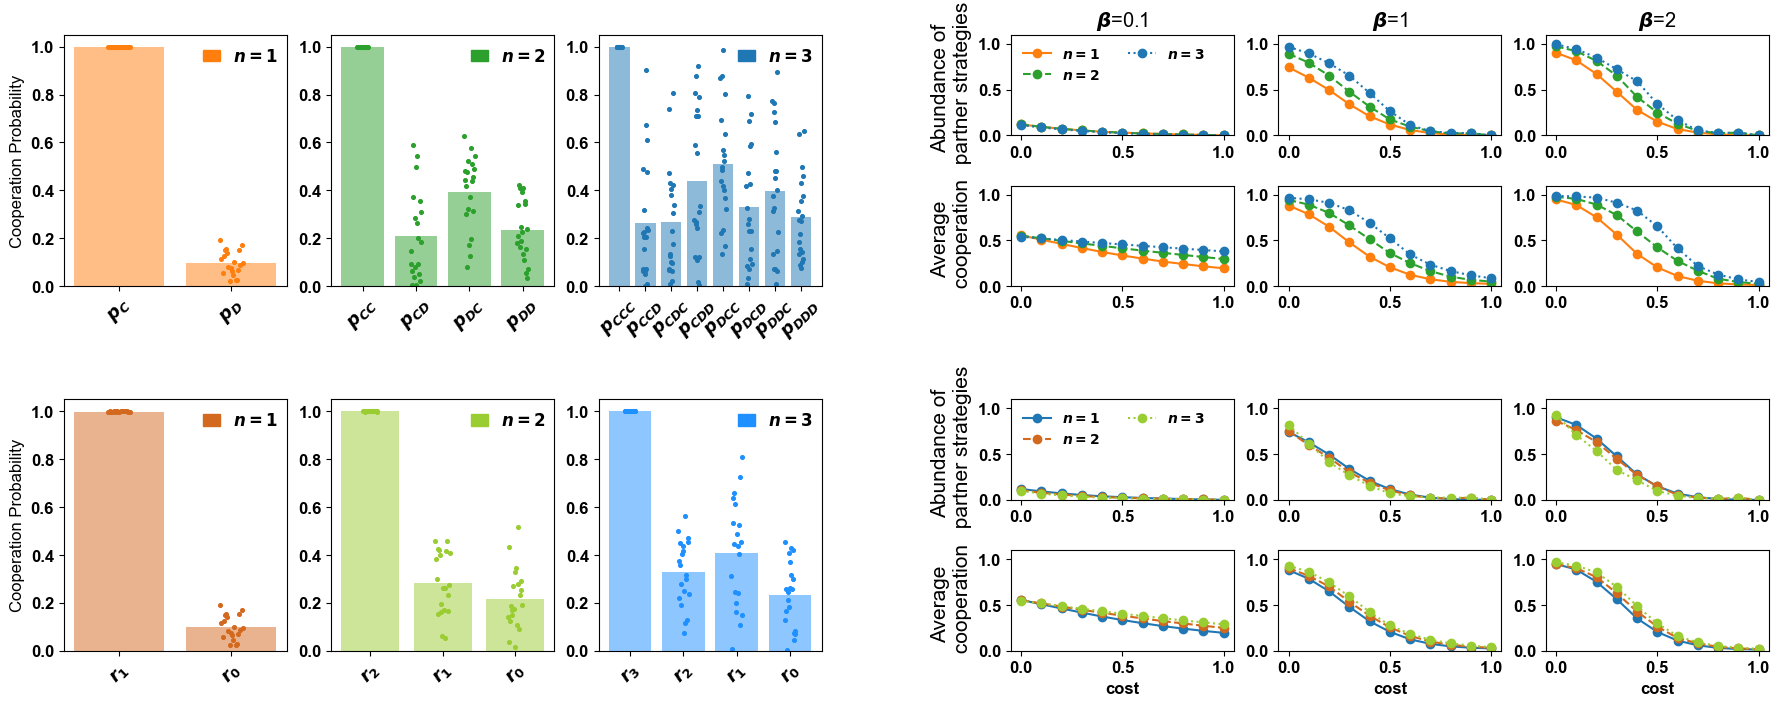

In [40]:
spacing = np.linspace(-0.1, 0.1, 20)

evens = np.arange(1, 17, 1)


fig = plt.figure(figsize=(22, 8))

outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.45)

count = 0

for i, plot in enumerate([0, 2]):
    inner = gridspec.GridSpecFromSubplotSpec(
        1, 3, subplot_spec=outer[plot], wspace=0.2, hspace=0.1
    )

    for j, dist in enumerate(dists[i]):
        averages = np.mean(dist, axis=1)
        ax = plt.Subplot(fig, inner[j])

        for l, data in enumerate(dist):
            for l2, point in enumerate(data):
                _ = ax.scatter(
                    0 + evens[l] + spacing[l2],
                    point,
                    color=colors_dic[f"R{j + 1 + (i * 3)}"],
                    s=7,
                    zorder=2,
                )
            _ = ax.bar(
                evens[l],
                averages[l],
                color=colors_dic[f"R{j + 1 + (i * 3)}"],
                alpha=0.5,
            )

        label = [
            (
                mpatches.Patch(color=colors_dic[f"R{j + 1 + (i * 3)}"]),
                f"$n={(j % 3) + 1}$",
            )
        ]

        ax.legend(
            *zip(*label),
            bbox_to_anchor=(1.03, 1.01),
            handlelength=1,
            fontsize=12,
            frameon=False,
        )

        if (j + (i * 3)) == 0:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")

            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$p_C$", "$p_D$"], rotation=45, fontsize=13)
        if (j + (i * 3)) == 1:
            ax.set_xticks([1, 2, 3, 4])
            ax.set_xticklabels(
                ["$p_{CC}$", "$p_{CD}$", "$p_{DC}$", "$p_{DD}$"],
                rotation=45,
                fontsize=13,
            )
        if (j + (i * 3)) == 2:
            ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
            ax.set_xticklabels(
                [
                    "$p_{CCC}$",
                    "$p_{CCD}$",
                    "$p_{CDC}$",
                    "$p_{CDD}$",
                    "$p_{DCC}$",
                    "$p_{DCD}$",
                    "$p_{DDC}$",
                    "$p_{DDD}$",
                ],
                rotation=45,
                fontsize=13,
            )

        if (j + (i * 3)) == 3:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$r_1$", "$r_0$"], rotation=45, fontsize=13)

        if (j + (i * 3)) == 4:
            ax.set_xticks([1, 2, 3])
            ax.set_xticklabels(
                ["$r_2$", "$r_1$", "$r_0$"], rotation=45, fontsize=13
            )
        if (j + (i * 3)) == 5:
            ax.set_xticks(
                [
                    1,
                    2,
                    3,
                    4,
                ]
            )
            ax.set_xticklabels(
                [
                    "$r_3$",
                    "$r_2$",
                    "$r_1$",
                    "$r_0$",
                ],
                rotation=45,
                fontsize=13,
            )

        fig.add_subplot(ax)

inner = gridspec.GridSpecFromSubplotSpec(
    2, 3, subplot_spec=outer[1], wspace=0.2, hspace=0.5
)

for i, df in enumerate([beta_point, beta_one, beta_two]):
    df.sort_values(by="type")
    groups_type = df.groupby("type")

    ax = plt.Subplot(fig, inner[0, i])
    if i == 0:
        ax.set_ylabel(
            "Abundance of \n partner strategies",
            fontweight="normal",
            fontsize=15,
        )
    for j, (type_, group) in enumerate(groups_type):
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            abudance.append(
                cost_group[cost_group["isPartner"] == True][
                    "frequencies norm"
                ].sum()
            )

        ax.plot(
            np.linspace(0, 1, 11),
            abudance,
            linestyles[j],
            color=colors_dic[f"R{j + 1}"],
            label=f"$n = {j + 1}$",
        )
        ax.set_ylim(0, 1.1)
    if i == 0:
        ax.legend(fontsize=10, loc=2, ncols=2, frameon=False)
    ax.set_title(labels[i])
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1, i])
    if i == 0:
        ax.set_ylabel(
            "Average \n cooperation", fontweight="normal", fontsize=15
        )
    for j, (type_, group) in enumerate(groups_type):
        points = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(
                sum(cost_group["frequencies norm"] * cost_group["cooperation"])
            )
            abudance.append(
                cost_group[cost_group["isPartner"] == True][
                    "frequencies norm"
                ].sum()
            )

        ax.plot(
            np.linspace(0, 1, 11),
            points,
            linestyles[j],
            color=colors_dic[f"R{j + 1}"],
            label=f"$n = {j + 1}$",
        )
        ax.set_ylim(0, 1.1)

    fig.add_subplot(ax)


inner = gridspec.GridSpecFromSubplotSpec(
    2, 3, subplot_spec=outer[3], wspace=0.2, hspace=0.5
)

for i, df in enumerate([count_beta_point, count_beta_one, count_beta_two]):
    df.sort_values(by="type")
    groups_type = df.groupby("type")

    ax = plt.Subplot(fig, inner[0, i])
    if i == 0:
        ax.set_ylabel(
            "Abundance of \n partner strategies",
            fontweight="normal",
            fontsize=15,
        )
    for j, (type_, group) in enumerate(groups_type):
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            abudance.append(
                cost_group[cost_group["isPartner"] == True][
                    "frequencies norm"
                ].sum()
            )

        ax.plot(
            np.linspace(0, 1, 11),
            abudance,
            linestyles[j],
            color=colors_dic[f"R{2 + j + 1}"],
            label=f"$n = {j + 1}$",
        )
        ax.set_ylim(0, 1.1)
    if i == 0:
        ax.legend(fontsize=10, loc=2, frameon=False, ncols=2)
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1, i])
    if i == 0:
        ax.set_ylabel(
            "Average \n cooperation", fontweight="normal", fontsize=15
        )
    for j, (type_, group) in enumerate(groups_type):
        points = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(
                sum(cost_group["frequencies norm"] * cost_group["cooperation"])
            )
            abudance.append(
                cost_group[cost_group["isPartner"] == True][
                    "frequencies norm"
                ].sum()
            )

        ax.plot(
            np.linspace(0, 1, 11),
            points,
            linestyles[j],
            color=colors_dic[f"R{2 + j + 1}"],
            label=f"$n = {j + 1}$",
        )
        ax.set_ylim(0, 1.1)
    ax.set_xlabel("cost")
    fig.add_subplot(ax)

fig.savefig("../figures/abundant_strategies.pdf", bbox_inches="tight")